# MTC Network Simulation (5 MTDs)

## Import libraries

In [1]:
import numpy as np
import random as rd
import pandas as pd
import seaborn as sns
from random import choices
import matplotlib.pylab as plt
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "Picture1.png", width=800, height=800)

## MTD X (periodic transmission)

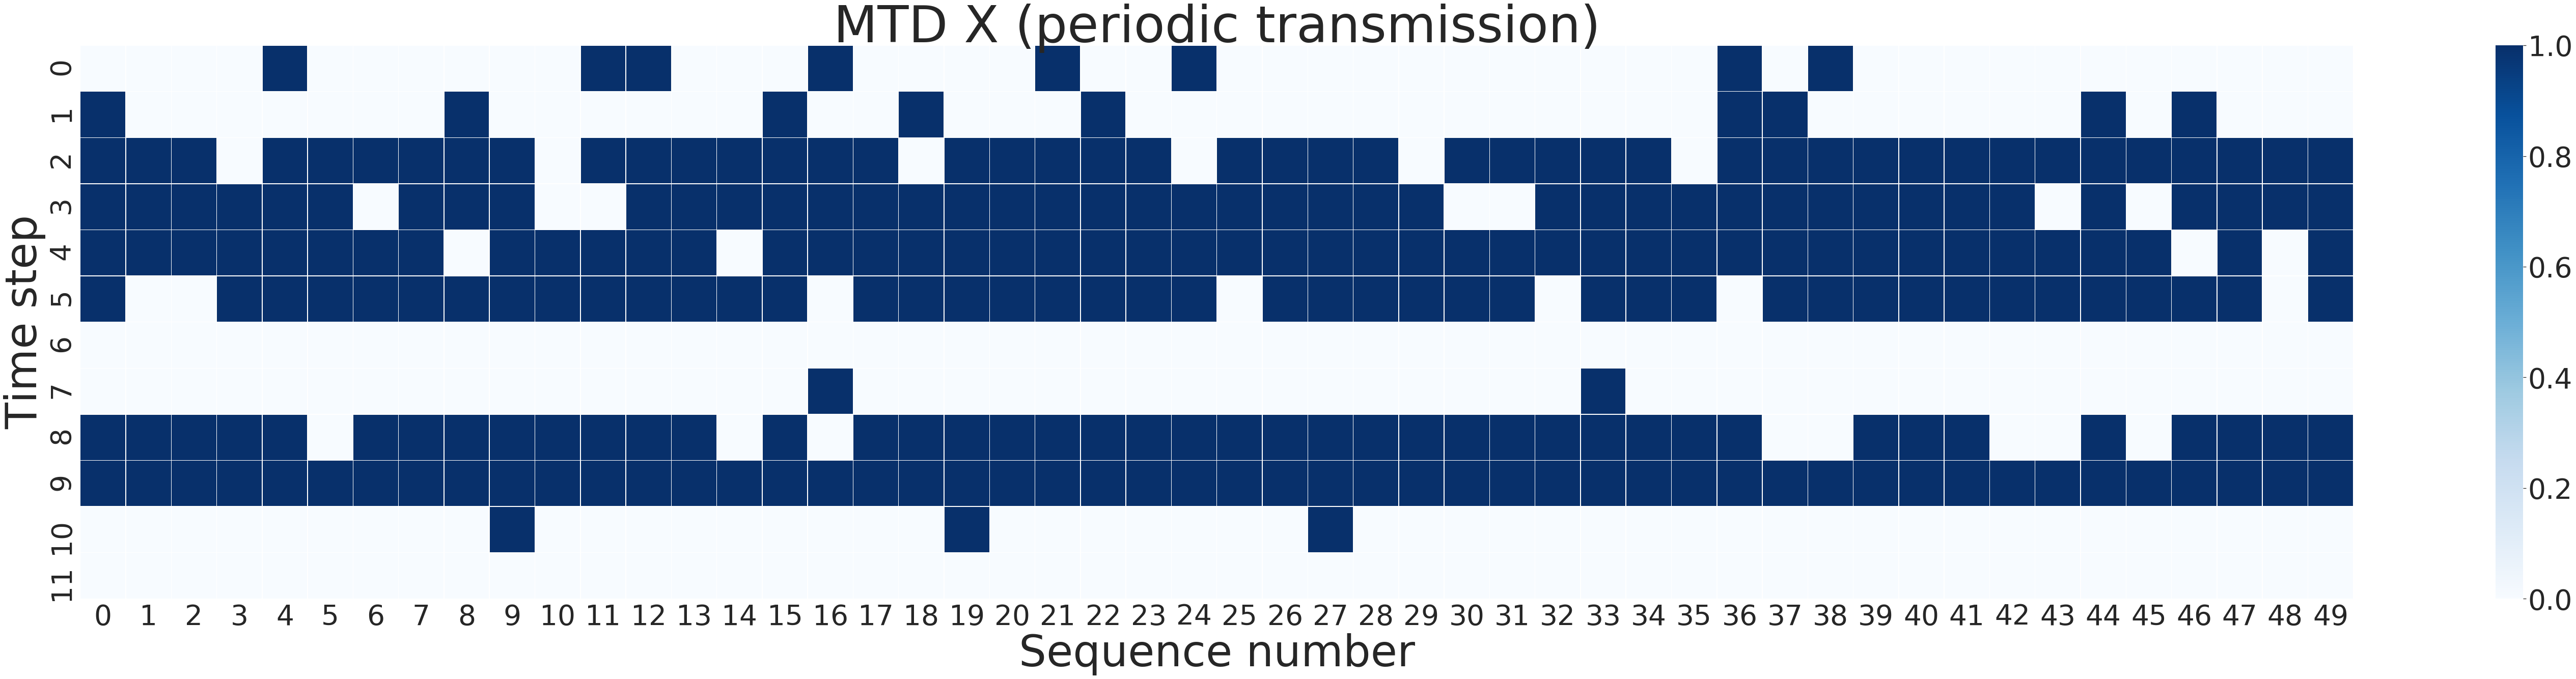

In [10]:
Xp=[1,0,0.15,0.85,
    1,0,0.10,0.90,
    1,0,0.95,0.05,
    1,0,0.85,0.15,
    1,0,0.90,0.10,
    1,0,0.80,0.20,
    1,0,0.00,1.00,
    1,0,0.05,0.95,
    1,0,0.85,0.15,
    1,0,0.95,0.05,
    1,0,0.10,0.90,
    1,0,0.00,1.00]

Xt = [0,4,8,12,16,20,24,28,32,36,40,44]
Xd = []
dis = []
for j in Xt:
    population = [Xp[j],Xp[j+1]]
    weights = [Xp[j+2],Xp[j+3]]
    Xa = choices(population, weights,k=1000)
    Xd.append(Xa)
    dis.append(weights)
Xd = np.array(Xd)
dis = np.array(dis)
Xtrans = np.transpose(Xd)
dis  = np.transpose(dis)
Xtrans = Xd.reshape(-1,1)

#################################################

fig, ax = plt.subplots(figsize=(100,20)) 
ax = sns.heatmap(Xd[0:12,0:50], cmap="Blues",linewidth=0.5, ax=ax)
sns.set(font_scale=5)
plt.title('MTD X (periodic transmission)', fontsize = 100) # title with fontsize 100
plt.xlabel('Sequence number', fontsize = 85) # x-axis label with fontsize 85
plt.ylabel('Time step', fontsize = 85) # y-axis label with fontsize 85
plt.show()

## MTD Y (random transmission)

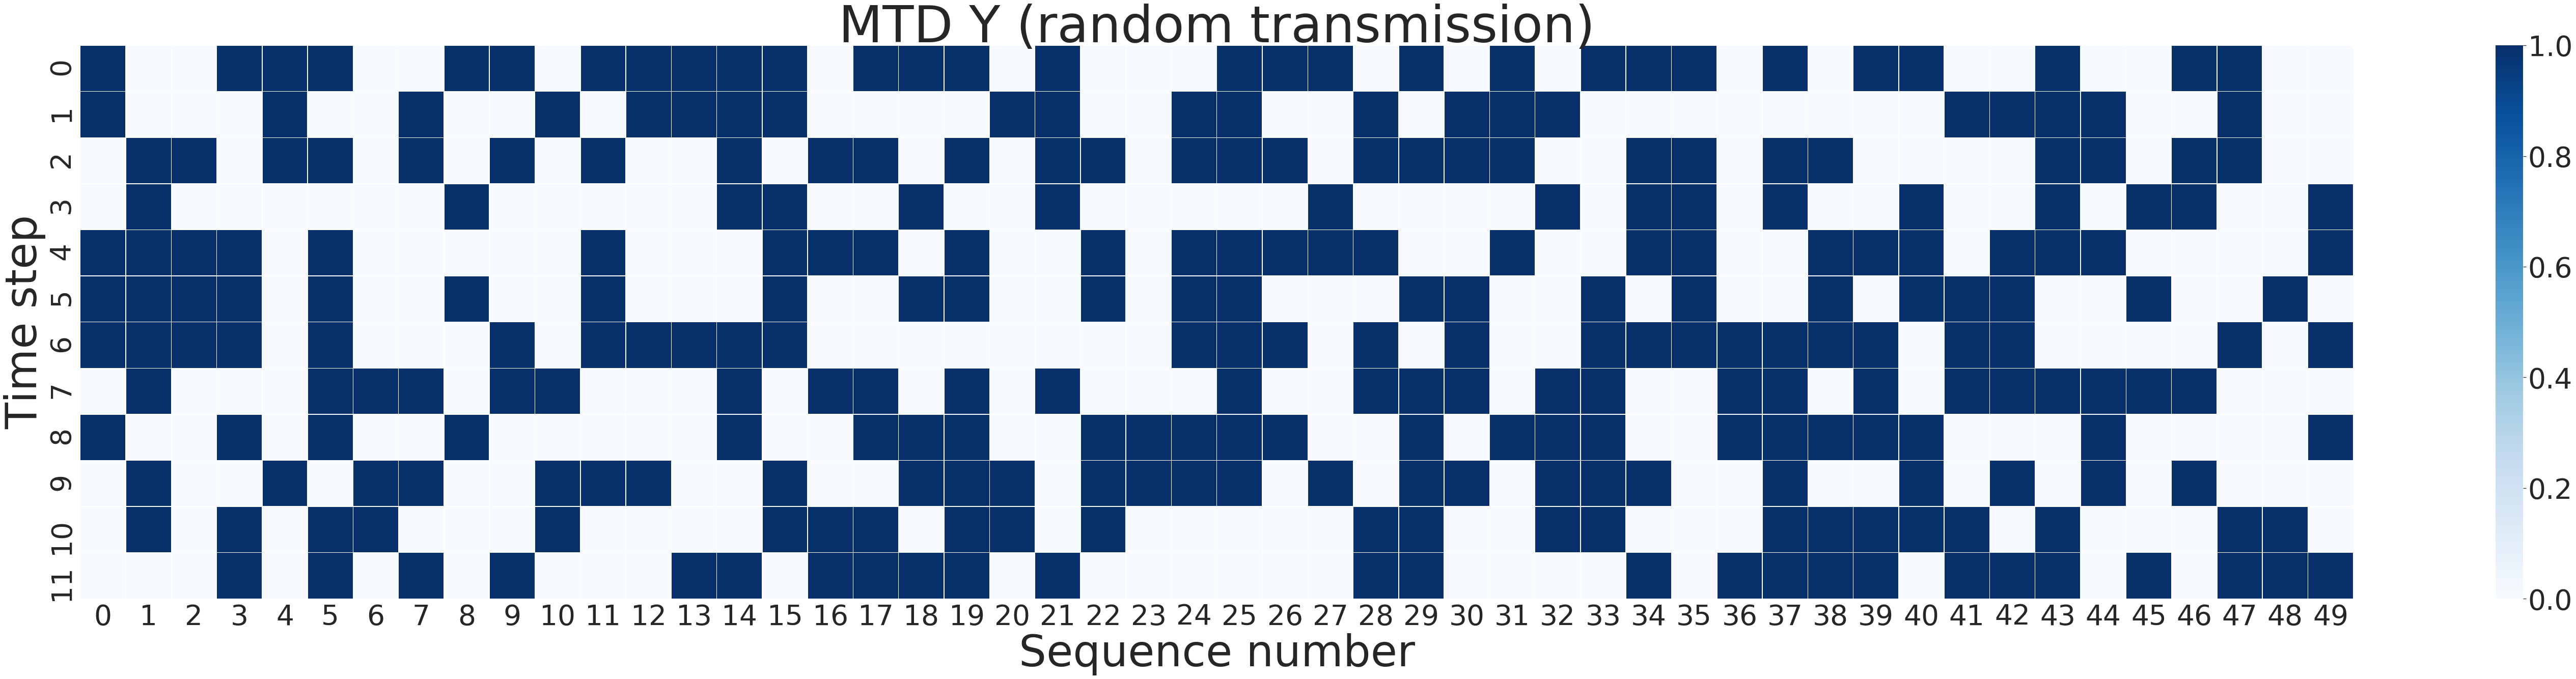

In [3]:
Ytrans = []
for i in range(0,12000):
    Ya = rd.randint(0,1)
    Ytrans.append(Ya)
Ytrans = np.array(Ytrans)
Ytrans = Ytrans.reshape(-1,1)

fig, ax = plt.subplots(figsize=(100,20)) 
ax = sns.heatmap((Ytrans.reshape(12,1000))[0:12,0:50], cmap="Blues",linewidth=0.5, ax=ax)
plt.title('MTD Y (random transmission)', fontsize = 100) # title with fontsize 100
plt.xlabel('Sequence number', fontsize = 85) # x-axis label with fontsize 85
plt.ylabel('Time step', fontsize = 85) # y-axis label with fontsize 85
plt.show()

## MTD Z, T and W (event-driven transmission)

In [4]:
Zd = [[0],[0],[0]]
population_Z = [1,0]
weights_Z = [0.7,0.3]
for i in range(3, np.shape(Xtrans)[0]):
    if Xtrans[i-3] == 1:
        Za = choices(population_Z, weights_Z)
    if Xtrans[i-3] == 0:
        Za = [0]
    Zd.append(Za)
Zd = np.array(Zd)

################################################
Td = [[0],[0]]
population_T = [1,0]
weights_T = [0.7,0.3]
for i in range(2, np.shape(Ytrans)[0]):
    if Ytrans[i-2] == 1:
        Ta = choices(population_T, weights_T)
    if Ytrans[i-2] == 0:
        Ta = [0]
    Td.append(Ta)
Td = np.array(Td)

##################################################
Wd = [[0]]
population_W = [1,0]
weights_W = [1,0]
for i in range(1, np.shape(Td)[0]):
    if Td[i-1] == 1:
        Wa = choices(population_W, weights_W)
    if Td[i-1] == 0:
        Wa = [0]
    Wd.append(Wa)
Wd = np.array(Wd)

## Concatenate MTD X, Y, Z, T and W Transmission data 

Finally, all 5-MTD transmission time series concatenate in to MTD-Tx array with (12000, 5) and save them in to MTD_Tx.csv file.

In [6]:
MTD_Tx = np.concatenate((Xtrans,Ytrans,Zd,Td,Wd),axis=1)

In [7]:
MTD_Tx.shape

(12000, 5)

In [8]:
MTD_Tx[0:20,:]

array([[1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 1, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 1, 0, 0, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 1, 0, 1, 1],
       [0, 1, 1, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 1, 1],
       [1, 1, 0, 0, 1],
       [1, 1, 0, 1, 0]])

## Save Transmission Data into CSV file

In [9]:
MTD_Tx = pd.DataFrame(MTD_Tx)
MTD_Tx.to_csv('MTD_Tx.csv', index=False)